In [121]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [150]:
plt.rcParams.update({'font.size': 14})

In [151]:
data = pd.read_csv("../output/test_invalid_bha/invalid_bha.txt", delim_whitespace=True, header=None)
data = data.drop(columns=[0,1,2,3,4,5,6,7,8,10,14]).rename(columns={9: "thickness", 11: "gx", 12: "gy", 13: "gz"})
data["thickness"] = data["thickness"].apply(lambda x: float(x[5:]))
data["gr"] = np.hypot(data.gx, data.gy)
data.head(3)

,thickness,gx,gy,gz,gr
0,0.463912,-545.016,-1046.59,25.3385,1179.997063
1,0.461475,-546.889,-1045.62,25.3400,1180.003713
2,0.460906,-547.478,-1045.31,25.2895,1180.002185


Text(0.5, 1.0, 'Z distribution')

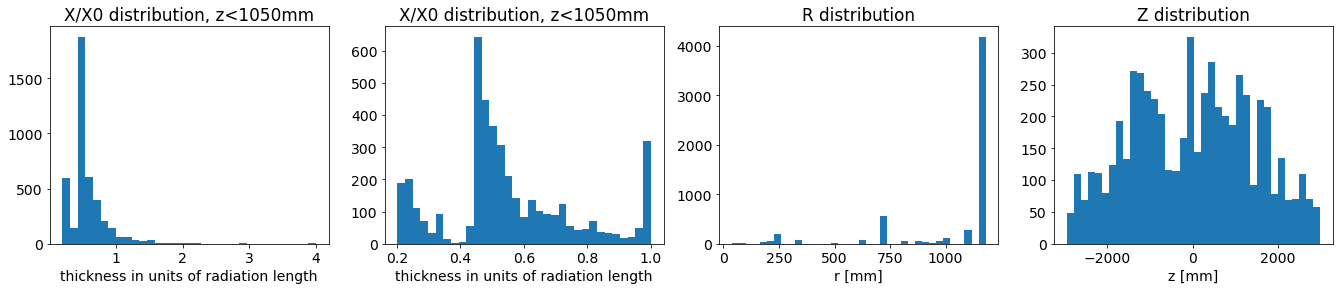

In [160]:
fig, ax = plt.subplots(1,4, figsize=(23,4))

ax[0].hist(np.clip(data[ data.gz < 1050 ].thickness, 0, 4), bins="rice")
ax[0].set_xlabel("thickness in units of radiation length")
ax[0].set_title("X/X0 distribution, z<1050mm")
ax[1].hist(np.clip(data[ data.gz < 1050 ].thickness, 0, 1), bins="rice")
ax[1].set_xlabel("thickness in units of radiation length")
ax[1].set_title("X/X0 distribution, z<1050mm")
ax[2].hist(data.gr, bins="rice")
ax[2].set_xlabel("r [mm]")
ax[2].set_title("R distribution")
ax[3].hist(data.gz, bins="rice")
ax[3].set_xlabel("z [mm]")
ax[3].set_title("Z distribution")

In [153]:
detector = pd.read_csv("../output/test_invalid_bha/csv/detectors.csv")
detector.head(3)

,geometry_id,volume_id,boundary_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,...,bound_param0,bound_param1,bound_param2,bound_param3,bound_param4,bound_param5,bound_param6,module_t,pitch_u,pitch_v
0,144115256795332608,2,0,1,0,0.0,0.0,0.0,1.0,0.0,...,11.300000,4001.0,3.141593,0,0,0,-1,-1.0,-1,-1
1,144115325514809344,2,0,2,0,0.0,0.0,0.0,1.0,0.0,...,24.000000,4001.0,3.141593,0,0,0,-1,-1.0,-1,-1
2,144115394234286080,2,0,3,0,0.0,0.0,0.0,1.0,0.0,...,27.662121,4001.0,3.141593,0,0,0,-1,-1.0,-1,-1


/tmp/ipykernel_26262/3846975891.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  cmap.ax.set_yticklabels([ "{:.1f}".format(t) if t < 1.0 else "> 1.0" for t in cmap.ax.get_yticks() ])


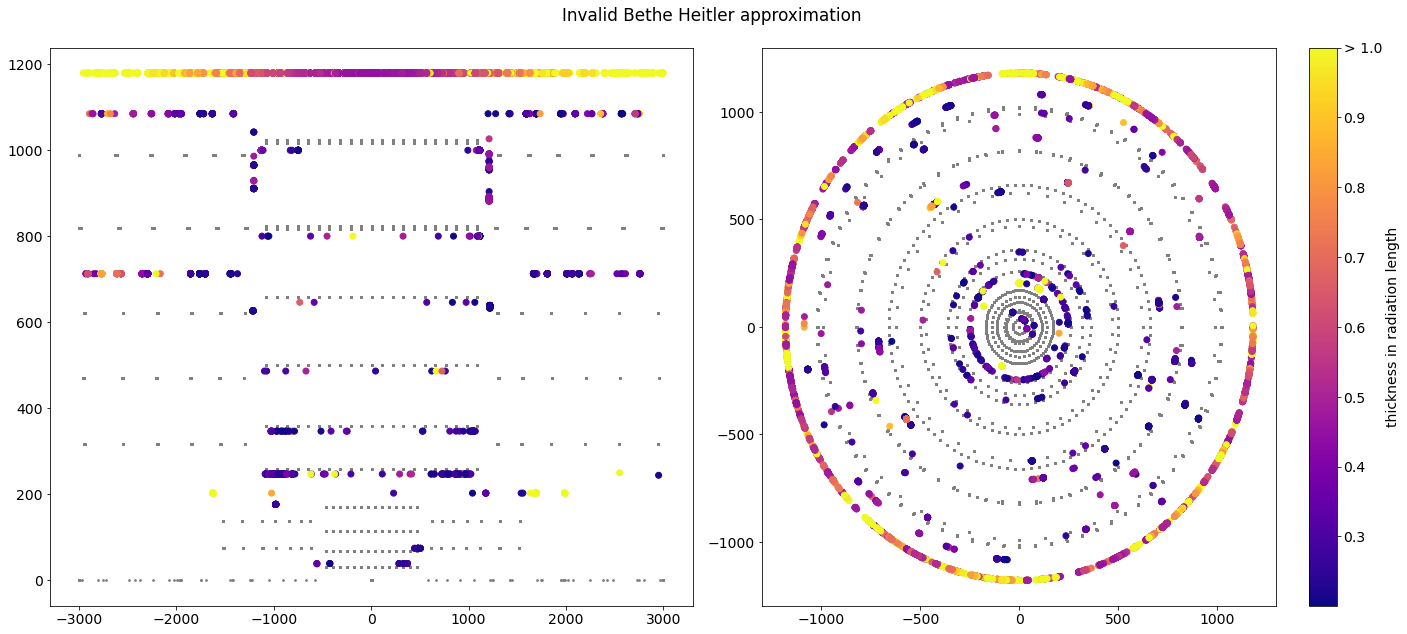

In [170]:
fig, ax = plt.subplots(1,2,figsize=(20,9))

ax[0].scatter(np.clip(detector.cz, -3000, 3000), np.hypot(detector.cx, detector.cy), color="grey", s=3)
ax[0].scatter(data.gz, data.gr, c=np.clip(data.thickness, 0, 1), cmap="plasma")

ax[1].scatter(detector.cx, detector.cy, color="grey", s=3)
cmap = fig.colorbar(ax[1].scatter(data.gx, data.gy, c=np.clip(data.thickness, 0, 1), cmap="plasma"))
cmap.set_label("thickness in radiation length")

cmap.ax.set_yticklabels([ "{:.1f}".format(t) if t < 1.0 else "> 1.0" for t in cmap.ax.get_yticks() ])

fig.suptitle("Invalid Bethe Heitler approximation")
fig.tight_layout()

In [177]:
data[ data.thickness > 3 ]

,thickness,gx,gy,gz,gr
1033,3.41835,-1033.31000,-569.7910,1684.940,1179.996330
1368,4.45527,-868.46000,-798.8600,1617.640,1180.000030
1376,126.18100,1061.52000,-515.3400,-1544.350,1180.000011
1406,6.89165,84.32470,-1176.9800,1867.830,1179.996854
1452,3.64575,-462.13500,-1085.7400,1326.020,1180.000045
2036,3.01266,76.04420,-709.2030,-2208.270,713.268263
2073,6.68994,-1179.31000,40.3144,-1831.410,1179.998867
3402,3.35902,-144.88400,-1171.0700,1669.960,1179.998440
3403,5.85554,-133.30000,-1172.4500,1683.400,1180.003344
3485,3.11309,1159.88000,217.0010,1446.590,1180.004682
